In [2]:
from pycaret.classification import *
# Load libraries
import numpy
import numpy as np
import matplotlib.pyplot as plt
from pandas import read_csv
import pandas as pd
import time as time
import seaborn as sns
from matplotlib import pyplot
from numpy import arange
from numpy import argmax
from pandas import set_option
set_option('display.max_rows', 500)
set_option('display.max_columns', 500)
set_option('display.width', 500)
#set_option('precision', 3)
from sklearn.metrics import fbeta_score
from sklearn.metrics import make_scorer
from boruta import BorutaPy
from pandas.plotting import scatter_matrix
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
from sklearn.preprocessing import StandardScaler,LabelEncoder,MinMaxScaler
from sklearn.preprocessing import binarize,PowerTransformer,OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold,StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.feature_selection import mutual_info_classif
from sklearn import metrics
from sklearn.metrics import make_scorer
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.calibration import CalibratedClassifierCV ,calibration_curve
from sklearn.metrics import confusion_matrix,classification_report
#from sklearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from lightgbm import LGBMClassifier
#from xgboost import XGBClassifier
#from catboost import CatBoostClassifier
from sklearn.dummy import DummyClassifier
from imblearn.combine import SMOTEENN
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score,KFold,GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from imblearn.under_sampling import EditedNearestNeighbours
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier
from imblearn.combine import SMOTETomek,SMOTEENN
from imblearn.over_sampling import SMOTE,RandomOverSampler,ADASYN,SMOTENC
from imblearn.under_sampling import ClusterCentroids,CondensedNearestNeighbour,EditedNearestNeighbours,NearMiss,RandomUnderSampler,TomekLinks
from imblearn.under_sampling import RepeatedEditedNearestNeighbours
from imblearn.metrics import classification_report_imbalanced,geometric_mean_score,sensitivity_score,specificity_score
from imblearn.ensemble import BalancedBaggingClassifier,BalancedRandomForestClassifier,EasyEnsembleClassifier,RUSBoostClassifier
from collections import Counter
from sklearn.metrics import average_precision_score
from sklearn.metrics import roc_auc_score,roc_curve,f1_score,precision_score,recall_score
from sklearn.metrics import precision_recall_curve,auc
from sklearn.feature_selection import VarianceThreshold
from sklearn.impute import SimpleImputer
from sklearn.metrics import SCORERS
from imblearn.over_sampling import SMOTE,RandomOverSampler
from collections import Counter
from scipy import stats
from scipy.stats import norm
from numpy import mean
from numpy import std
from scipy import stats
import numpy as np
from imblearn.metrics import sensitivity_score,specificity_score
sns.set_style(style='dark')
%matplotlib inline
from sklearn.metrics import roc_auc_score,balanced_accuracy_score,average_precision_score
from pycaret.classification import load_model
import warnings
warnings.filterwarnings("ignore")



In [3]:
df = pd.read_csv("stroke.csv")
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [4]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [5]:
df.describe(include = 'object')

,gender,ever_married,work_type,Residence_type,smoking_status
count,5110,5110,5110,5110,5110
unique,3,2,5,2,4
top,Female,Yes,Private,Urban,never smoked
freq,2994,3353,2925,2596,1892


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [7]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [8]:
df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'avg_glucose_level', 'bmi', 'smoking_status', 'stroke'], dtype='object')

In [9]:
df['bmi'].fillna(df['bmi'].mean(),inplace = True)
df.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [10]:
df.drop(columns='id',inplace = True)
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'avg_glucose_level', 'bmi', 'smoking_status', 'stroke'], dtype='object')

In [11]:
df['stroke'].value_counts()

0    4861
1     249
Name: stroke, dtype: int64

In [12]:
df['stroke'].value_counts(normalize = True)*100

0    95.127202
1     4.872798
Name: stroke, dtype: float64

In [13]:
# summarize the number of unique values in each column
print(df.nunique())

gender                  3
age                   104
hypertension            2
heart_disease           2
ever_married            2
work_type               5
Residence_type          2
avg_glucose_level    3979
bmi                   419
smoking_status          4
stroke                  2
dtype: int64


In [14]:
# locate rows of duplicate data
df.duplicated().any()

False

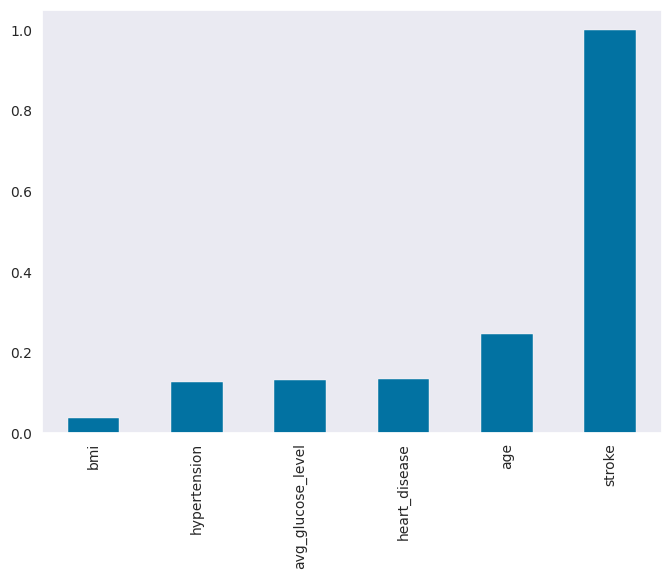

In [15]:
# plot correlation
df.corr()['stroke'].sort_values().plot(kind='bar')
plt.show()

Text(0.5, 1.0, 'Correlation Matrix(for dataset)')

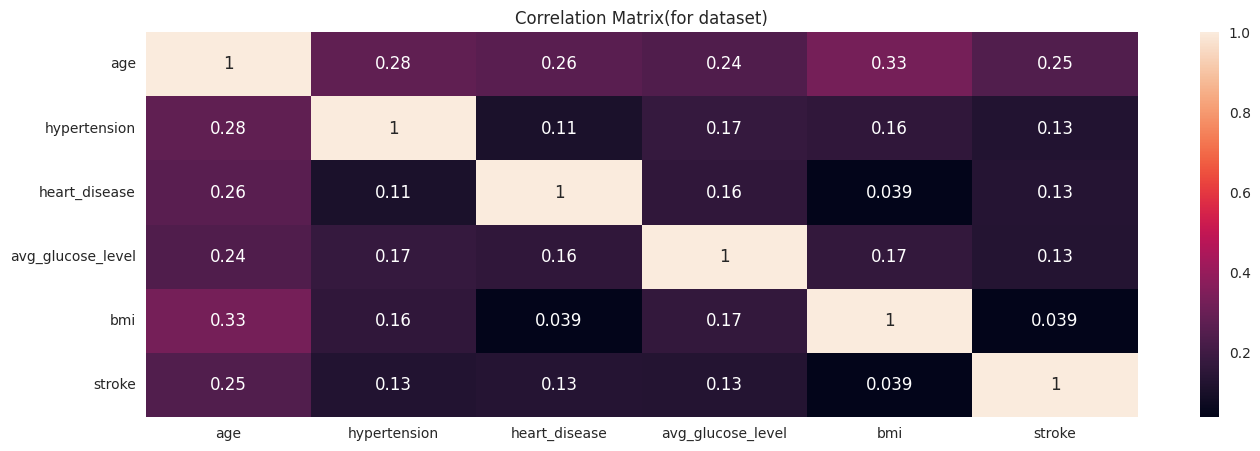

In [16]:
#Correlation for numeric
plt.figure(figsize=(16,5))
sns.heatmap(df.corr(),annot=True)
plt.title("Correlation Matrix(for dataset)")

In [17]:
df.shape

(5110, 11)

In [18]:
df_num=df.select_dtypes(exclude ='object')
df_num.shape

(5110, 6)

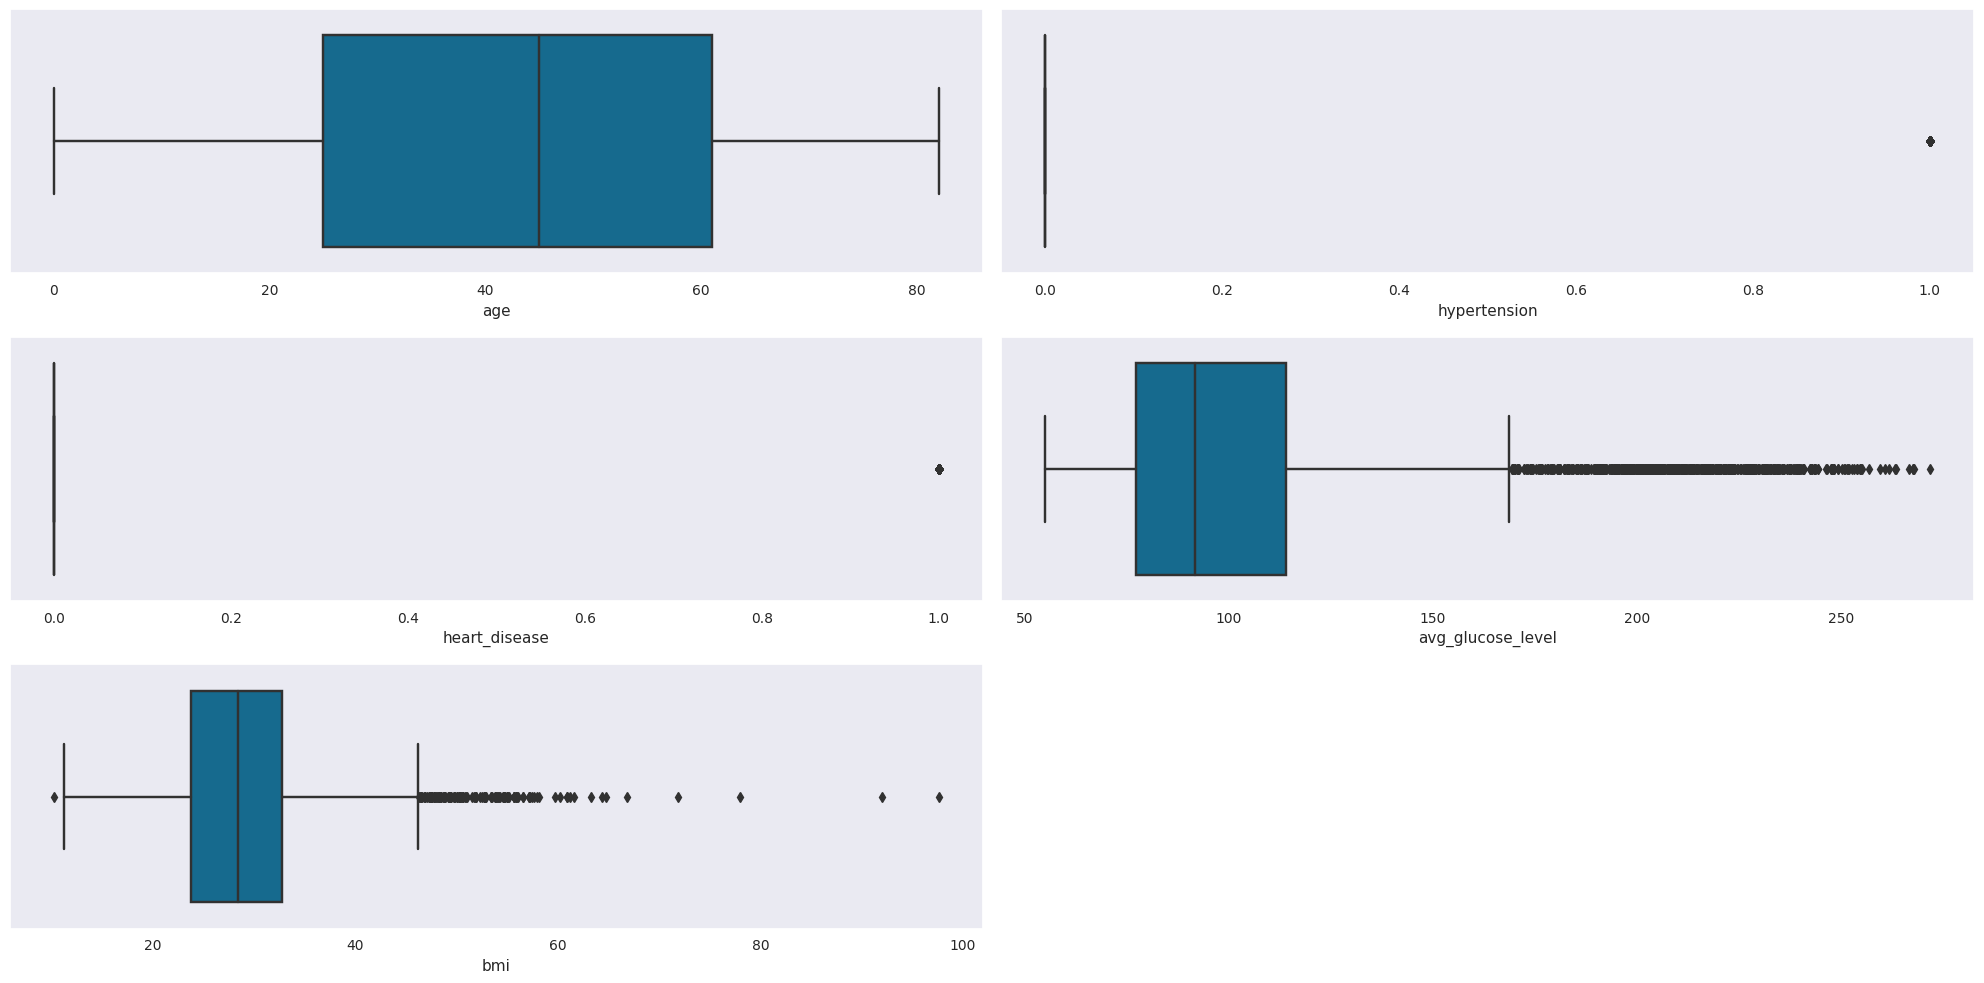

In [19]:
#Boxplot for checking of outliers
plt.figure(figsize=(20,10))
plotnumber = 1

for col in df_num.columns[:-1]:
    if plotnumber < 7:
        plt.subplot(3,2,plotnumber)
        sns.boxplot(df_num[col],orient='v')
        plt.xlabel(col)
    plotnumber +=1
plt.tight_layout()


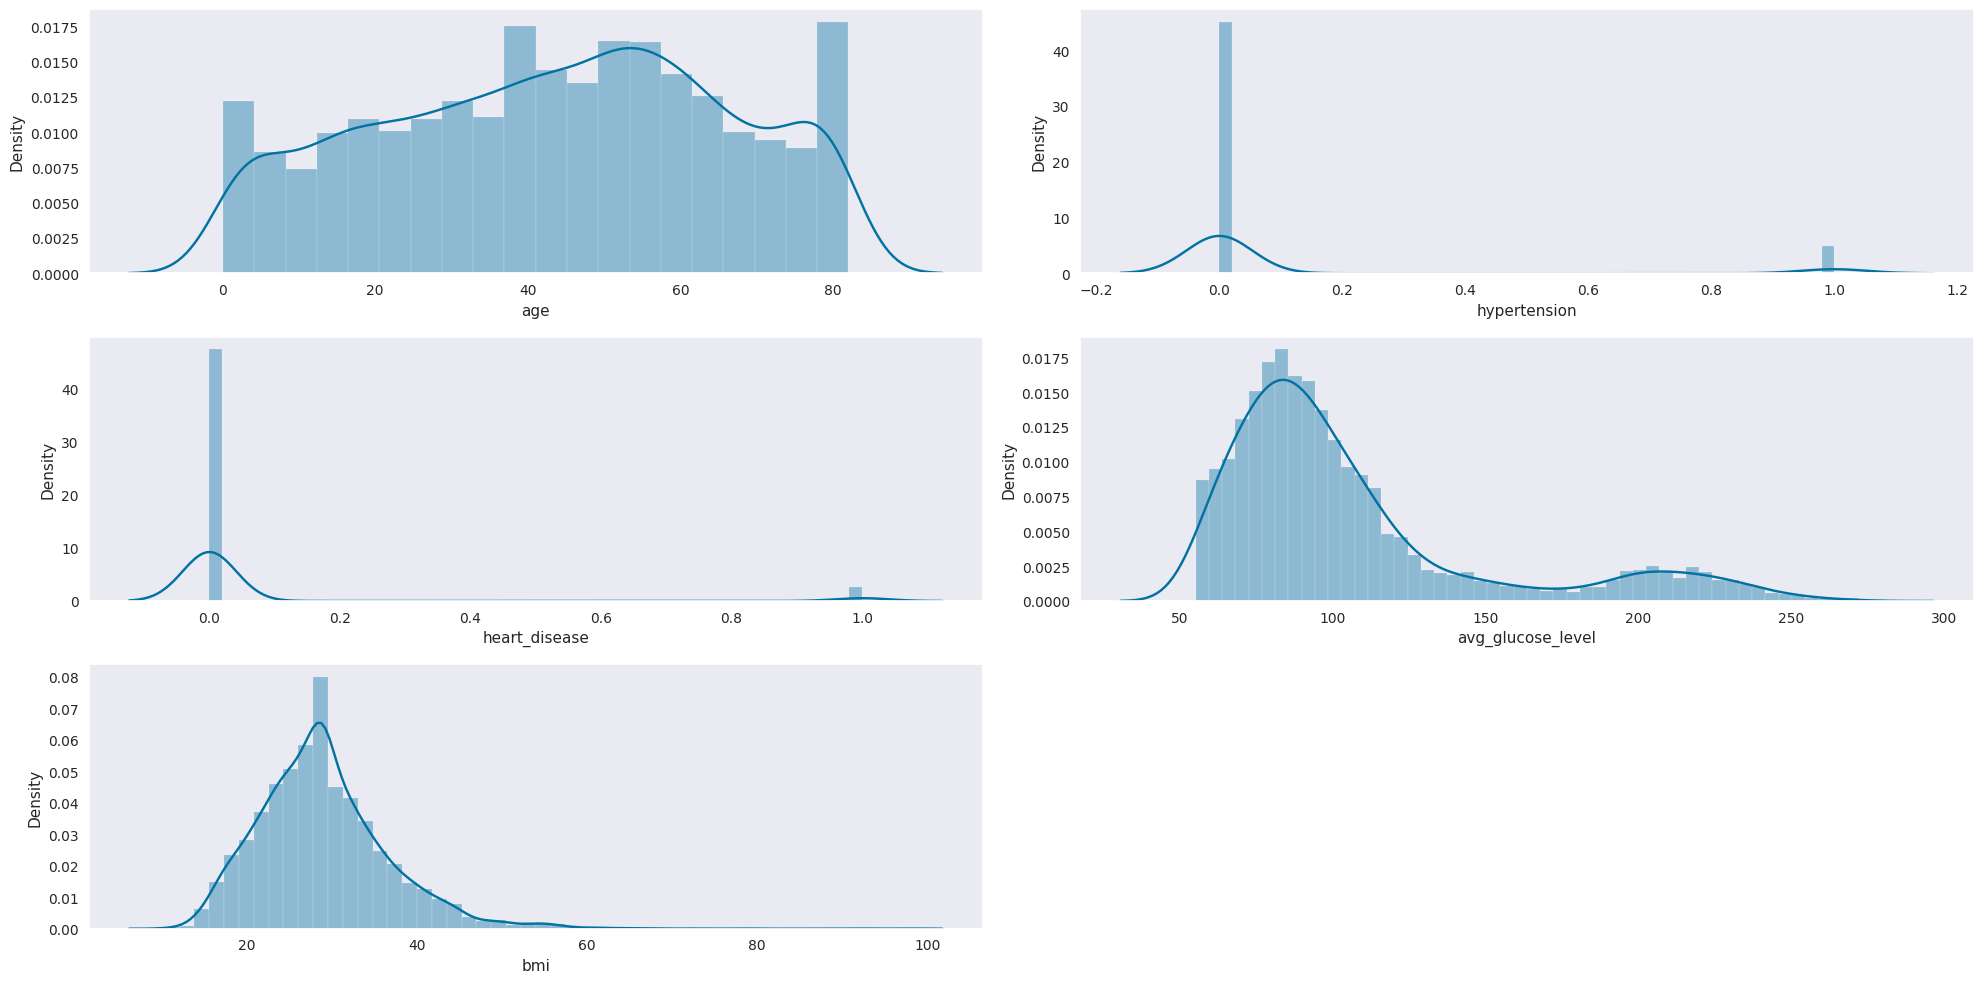

In [20]:
# histogram plot(for checking of skew,gaussian distribution)
plt.figure(figsize=(20,10))
plotnumber = 1

for col in df_num.columns[:-1]:
    if plotnumber < 7:
        plt.subplot(3,2,plotnumber)
        sns.distplot(df_num[col])
        plt.xlabel(col)
    plotnumber +=1
plt.tight_layout()


In [21]:
df.shape

(5110, 11)

<AxesSubplot:xlabel='gender', ylabel='stroke'>

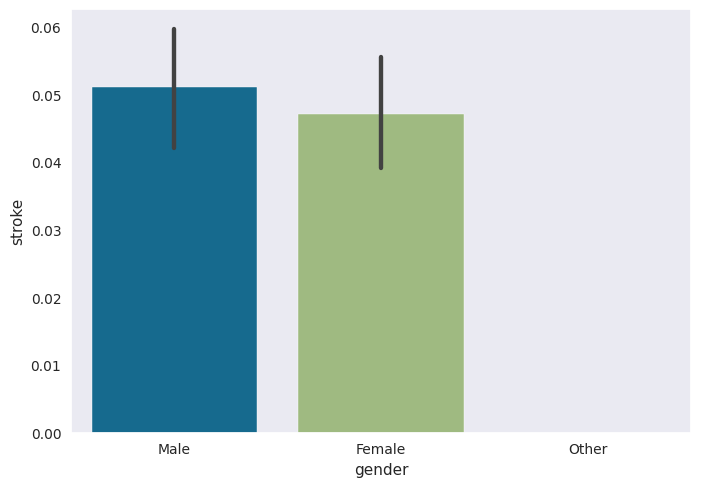

In [22]:
sns.barplot(data = df,x = 'gender',y ='stroke')

<AxesSubplot:xlabel='heart_disease', ylabel='stroke'>

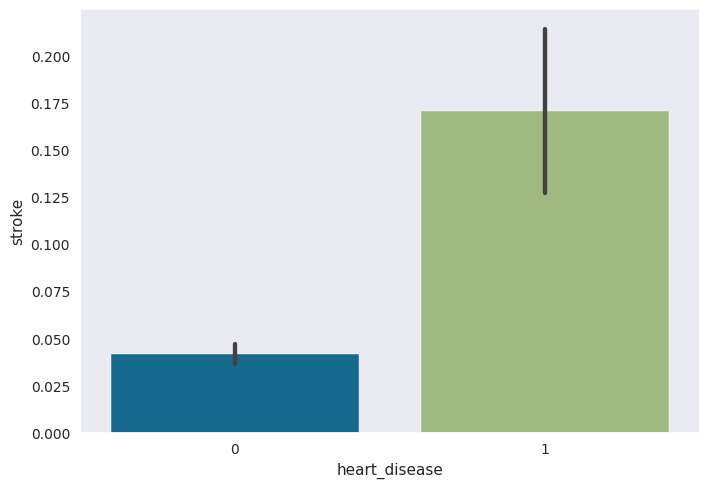

In [23]:
sns.barplot(data = df,x = 'heart_disease',y ='stroke')

<AxesSubplot:xlabel='ever_married', ylabel='stroke'>

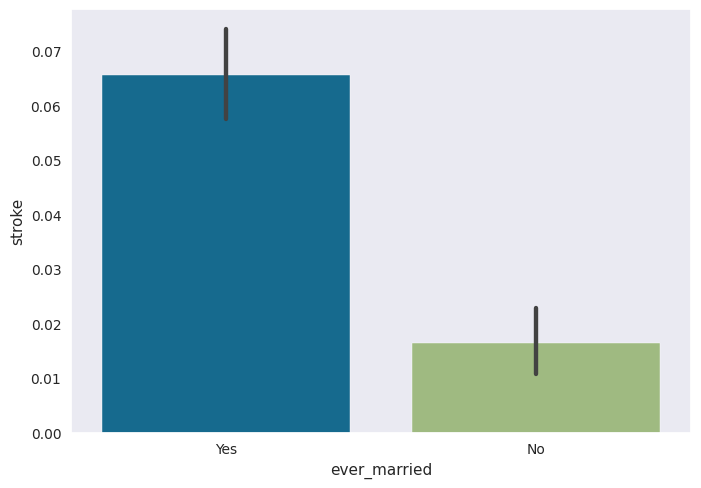

In [24]:
sns.barplot(data = df,x = 'ever_married',y ='stroke')

<AxesSubplot:xlabel='work_type', ylabel='stroke'>

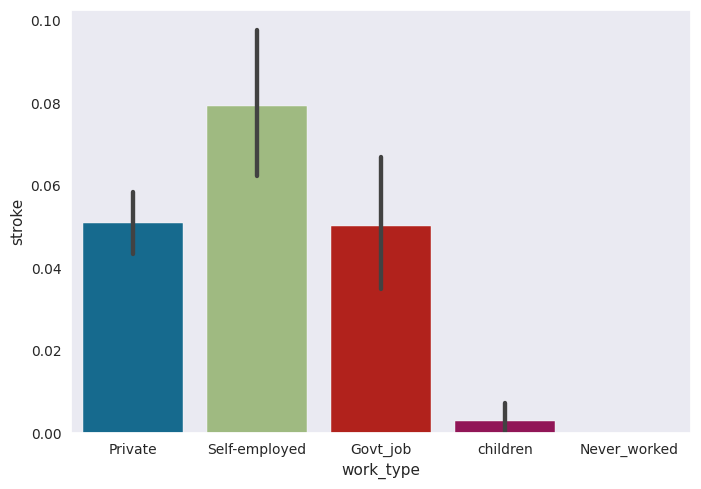

In [25]:
sns.barplot(data = df,x = 'work_type',y ='stroke')

<AxesSubplot:xlabel='Residence_type', ylabel='stroke'>

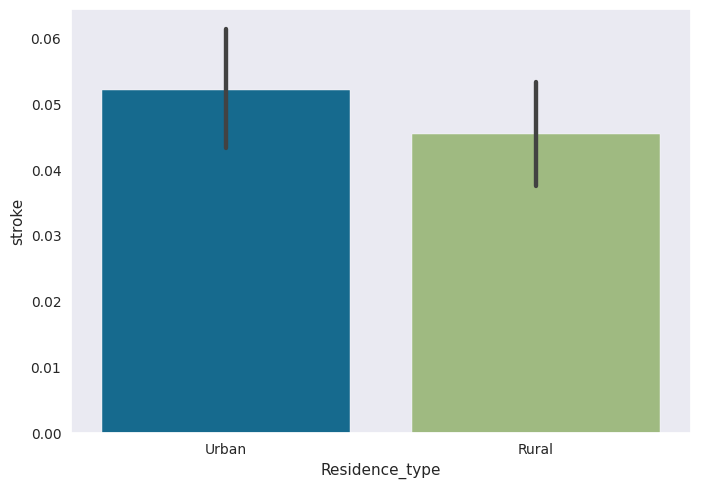

In [26]:
sns.barplot(data = df,x = 'Residence_type',y ='stroke')

<AxesSubplot:xlabel='smoking_status', ylabel='stroke'>

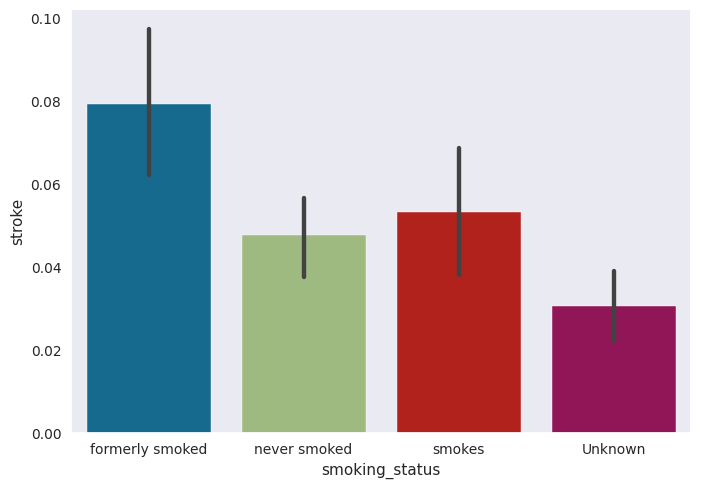

In [27]:
sns.barplot(data = df,x = 'smoking_status',y ='stroke')

<AxesSubplot:xlabel='age', ylabel='Count'>

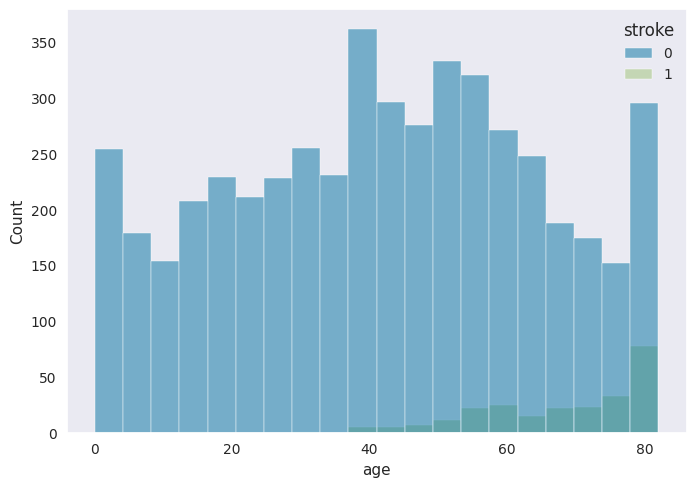

In [28]:
sns.histplot(data = df,x = 'age',hue='stroke')

<AxesSubplot:xlabel='avg_glucose_level', ylabel='Count'>

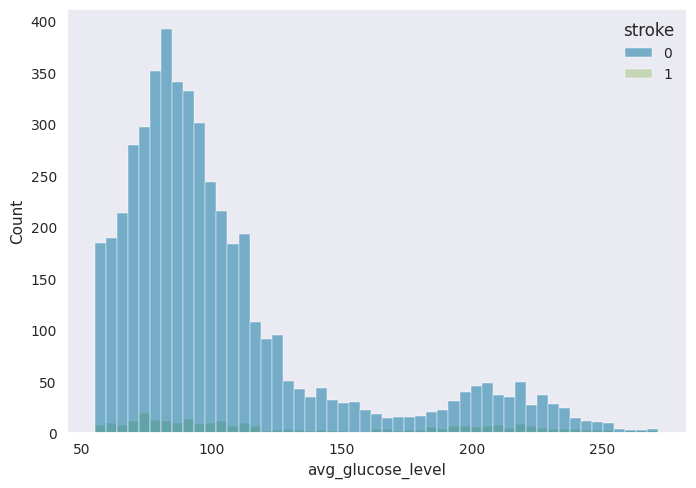

In [29]:
sns.histplot(data = df,x = 'avg_glucose_level',hue='stroke')

<AxesSubplot:xlabel='bmi', ylabel='Count'>

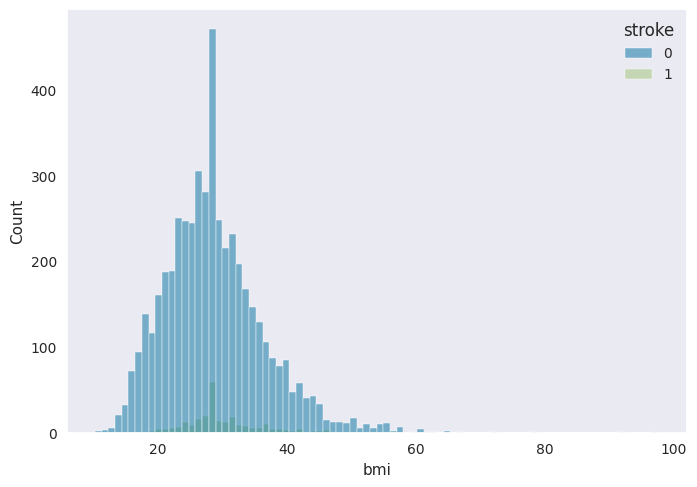

In [30]:
sns.histplot(data = df,x = 'bmi',hue='stroke')

In [31]:
train, unseen = train_test_split(df,test_size=0.30, random_state=42,shuffle=True,stratify = df['stroke'])
valid, unseen = train_test_split(unseen,test_size=0.50, random_state=42,shuffle=True,stratify = unseen['stroke'])
df.shape,train.shape, valid.shape,unseen.shape


((5110, 11), (3577, 11), (766, 11), (767, 11))

In [32]:
train["stroke"].value_counts(),train["stroke"].value_counts(normalize=True)*100

(0    3403
 1     174
 Name: stroke, dtype: int64,
 0    95.135588
 1     4.864412
 Name: stroke, dtype: float64)

In [33]:
valid["stroke"].value_counts(),valid["stroke"].value_counts(normalize=True)*100

(0    729
 1     37
 Name: stroke, dtype: int64,
 0    95.169713
 1     4.830287
 Name: stroke, dtype: float64)

In [34]:
unseen["stroke"].value_counts(),unseen["stroke"].value_counts(normalize=True)*100

(0    729
 1     38
 Name: stroke, dtype: int64,
 0    95.045632
 1     4.954368
 Name: stroke, dtype: float64)

In [34]:
#set up environment
history = setup(data=train,test_data=valid,
                     target='stroke',
                     silent=True,
                     normalize=True,
                     normalize_method='minmax',remove_outliers=True,
                     transformation=True,fold=5,
                     session_id=42)

# add metric geometric_mean
add_metric('geometric_mean', 'geometric mean', geometric_mean_score, greater_is_better = True)

# add metric balanced accuracy
add_metric('balanced_accuracy_score', 'balanced accuracy score', balanced_accuracy_score, greater_is_better = True)

# add metric fbeta score
add_metric('fbeta score', 'fbeta_score', fbeta_score,target = 'pred',beta = 2.0, greater_is_better = True)

# train using cross validation
best = compare_models(n_select=3,sort='fbeta_score')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,geometric mean,balanced accuracy score,fbeta_score,TT (Sec)
nb,Naive Bayes,0.7308,0.7904,0.6330,0.1076,0.1801,0.1175,0.1798,0.6576,0.6840,0.3054,0.1760
qda,Quadratic Discriminant Analysis,0.7317,0.5343,0.3167,0.0584,0.0849,0.0211,0.0343,0.4206,0.5333,0.1364,0.5480
dt,Decision Tree Classifier,0.9155,0.5388,0.1276,0.0993,0.1115,0.0679,0.0686,0.3354,0.5388,0.1206,0.0680
lightgbm,Light Gradient Boosting Machine,0.9514,0.8146,0.0778,0.2833,0.1205,0.1026,0.1272,0.2727,0.5337,0.0906,1.9780
catboost,CatBoost Classifier,0.9538,0.8095,0.0143,0.4000,0.0276,0.0181,0.0626,0.0756,0.5045,0.0177,4.9320
lda,Linear Discriminant Analysis,0.9570,0.8342,0.0140,0.3000,0.0267,0.0224,0.0555,0.0749,0.5061,0.0173,0.1040
gbc,Gradient Boosting Classifier,0.9544,0.8160,0.0140,0.2400,0.0256,0.0170,0.0414,0.0748,0.5047,0.0171,0.2900
ada,Ada Boost Classifier,0.9559,0.7876,0.0140,0.0900,0.0243,0.0182,0.0257,0.0747,0.5055,0.0169,0.1980
lr,Logistic Regression,0.9582,0.8387,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.5000,0.0000,36.6380
knn,K Neighbors Classifier,0.9556,0.5942,0.0000,0.0000,0.0000,-0.0046,-0.0078,0.0000,0.4986,0.0000,0.1900


In [35]:
#set up environment
history = setup(data=train,test_data=valid,
                     target='stroke',
                     silent=True,
                     normalize=True,
                     normalize_method='minmax',remove_outliers=True,fold=5,
                     #transformation=True,
                     session_id=42)

# add metric geometric_mean
add_metric('geometric_mean', 'geometric mean', geometric_mean_score, greater_is_better = True)

# add metric balanced accuracy
add_metric('balanced_accuracy_score', 'balanced accuracy score', balanced_accuracy_score, greater_is_better = True)

# add metric fbeta score
add_metric('fbeta score', 'fbeta_score', fbeta_score,target = 'pred',beta = 2.0, greater_is_better = True)

# train using cross validation
best = compare_models(n_select=3,sort='fbeta_score')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,geometric mean,balanced accuracy score,fbeta_score,TT (Sec)
nb,Naive Bayes,0.6311,0.7823,0.7116,0.0978,0.1657,0.1001,0.1653,0.6269,0.6696,0.2899,0.0520
dt,Decision Tree Classifier,0.9185,0.5470,0.1416,0.1159,0.1271,0.0849,0.0856,0.3581,0.5470,0.1353,0.0640
qda,Quadratic Discriminant Analysis,0.8644,0.4835,0.0909,0.0349,0.0481,-0.0010,-0.0033,0.2483,0.4945,0.0654,0.1020
lightgbm,Light Gradient Boosting Machine,0.9529,0.8141,0.0426,0.2238,0.0711,0.0573,0.0798,0.1812,0.5176,0.0507,0.6340
gbc,Gradient Boosting Classifier,0.9538,0.8209,0.0212,0.1667,0.0365,0.0263,0.0427,0.1124,0.5078,0.0254,0.5800
catboost,CatBoost Classifier,0.9556,0.8108,0.0143,0.3000,0.0271,0.0203,0.0534,0.0756,0.5055,0.0176,20.0580
ada,Ada Boost Classifier,0.9564,0.7798,0.0138,0.1667,0.0254,0.0201,0.0376,0.0742,0.5057,0.0169,0.3400
lda,Linear Discriminant Analysis,0.9553,0.8348,0.0069,0.0400,0.0118,0.0057,0.0074,0.0370,0.5018,0.0083,0.1100
lr,Logistic Regression,0.9582,0.8375,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.5000,0.0000,0.2240
knn,K Neighbors Classifier,0.9564,0.5765,0.0000,0.0000,0.0000,-0.0034,-0.0078,0.0000,0.4991,0.0000,0.2240


In [36]:
#set up environment
history = setup(data=train,test_data=valid,fold=5,
                     target='stroke',
                     silent=True,
                     normalize=True,
                     normalize_method='minmax',#remove_outliers=True,
                     transformation=True,
                     session_id=42)

# add metric geometric_mean
add_metric('geometric_mean', 'geometric mean', geometric_mean_score, greater_is_better = True)

# add metric balanced accuracy
add_metric('balanced_accuracy_score', 'balanced accuracy score', balanced_accuracy_score, greater_is_better = True)

# add metric fbeta score
add_metric('fbeta score', 'fbeta_score', fbeta_score,target = 'pred',beta = 2.0, greater_is_better = True)

# train using cross validation
best = compare_models(n_select=3,sort='fbeta_score')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,geometric mean,balanced accuracy score,fbeta_score,TT (Sec)
nb,Naive Bayes,0.2399,0.8076,0.9941,0.0603,0.1136,0.0241,0.1062,0.4425,0.5977,0.2422,0.1080
dt,Decision Tree Classifier,0.9131,0.5778,0.2064,0.1790,0.1899,0.1447,0.1459,0.4367,0.5778,0.1990,0.0240
qda,Quadratic Discriminant Analysis,0.6667,0.4844,0.2825,0.0334,0.0590,-0.0095,-0.0160,0.3277,0.4844,0.1105,0.0640
lightgbm,Light Gradient Boosting Machine,0.9441,0.8249,0.0571,0.2633,0.0917,0.0731,0.0984,0.2101,0.5233,0.0672,0.4740
lda,Linear Discriminant Analysis,0.9446,0.8345,0.0457,0.1983,0.0732,0.0565,0.0734,0.1870,0.5182,0.0538,0.0400
et,Extra Trees Classifier,0.9455,0.7482,0.0229,0.1286,0.0388,0.0253,0.0354,0.1150,0.5078,0.0274,0.3360
catboost,CatBoost Classifier,0.9480,0.8168,0.0171,0.2500,0.0319,0.0231,0.0509,0.1013,0.5064,0.0210,3.4600
gbc,Gradient Boosting Classifier,0.9488,0.8343,0.0171,0.2000,0.0311,0.0238,0.0447,0.1012,0.5068,0.0209,0.3020
ada,Ada Boost Classifier,0.9500,0.8000,0.0116,0.3000,0.0222,0.0176,0.0487,0.0681,0.5048,0.0143,0.1820
lr,Logistic Regression,0.9511,0.8386,0.0000,0.0000,0.0000,-0.0005,-0.0017,0.0000,0.4999,0.0000,0.0960


In [37]:
#set up environment
history = setup(data=train,test_data=valid,fold=5,
                     target='stroke',
                     silent=True,
                     normalize=True,
                     normalize_method='minmax',#remove_outliers=True,
                     #transformation=True,
                     session_id=42)

# add metric geometric_mean
add_metric('geometric_mean', 'geometric mean', geometric_mean_score, greater_is_better = True)

# add metric balanced accuracy
add_metric('balanced_accuracy_score', 'balanced accuracy score', balanced_accuracy_score, greater_is_better = True)

# add metric fbeta score
add_metric('fbeta score', 'fbeta_score', fbeta_score,target = 'pred',beta = 2.0, greater_is_better = True)

# train using cross validation
best = compare_models(n_select=3,sort='fbeta_score')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,geometric mean,balanced accuracy score,fbeta_score,TT (Sec)
nb,Naive Bayes,0.2321,0.8108,0.9941,0.0597,0.1126,0.0229,0.1034,0.4329,0.5936,0.2404,0.0240
qda,Quadratic Discriminant Analysis,0.6547,0.5297,0.3911,0.0563,0.0970,0.0150,0.0267,0.4860,0.5297,0.1735,0.0240
dt,Decision Tree Classifier,0.9119,0.5554,0.1605,0.1428,0.1500,0.1040,0.1047,0.3849,0.5554,0.1558,0.0260
lda,Linear Discriminant Analysis,0.9441,0.8353,0.0632,0.2399,0.0988,0.0797,0.0998,0.2459,0.5262,0.0738,0.0300
lightgbm,Light Gradient Boosting Machine,0.9410,0.8222,0.0457,0.1860,0.0714,0.0503,0.0662,0.1901,0.5162,0.0533,0.1020
knn,K Neighbors Classifier,0.9502,0.6021,0.0289,0.3000,0.0526,0.0459,0.0828,0.1300,0.5131,0.0353,0.1140
et,Extra Trees Classifier,0.9455,0.7466,0.0286,0.1444,0.0475,0.0334,0.0449,0.1289,0.5105,0.0340,0.3380
catboost,CatBoost Classifier,0.9480,0.8168,0.0171,0.2500,0.0319,0.0231,0.0509,0.1013,0.5064,0.0210,3.0540
gbc,Gradient Boosting Classifier,0.9488,0.8343,0.0171,0.2000,0.0311,0.0238,0.0447,0.1012,0.5068,0.0209,0.3040
ada,Ada Boost Classifier,0.9500,0.8000,0.0116,0.3000,0.0222,0.0176,0.0487,0.0681,0.5048,0.0143,0.1660


/home/rotimi123/anaconda3/envs/pycaret_notabook/lib/python3.8/site-packages/sklearn/utils/deprecation.py:101: FutureWarning: The outputs_2d_ attribute is deprecated in version 0.22 and will be removed in version 0.24. It is equivalent to n_outputs_ > 1.
  warnings.warn(msg, category=FutureWarning)
/home/rotimi123/anaconda3/envs/pycaret_notabook/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/rotimi123/anaconda3/envs/pycaret_notabook/lib/python3.8/site-packages/sklearn/metrics/_classification.py:846: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)
/home/rotimi123/anaconda3/envs/pycaret_notabook/lib/python3.8/site-packages/sklearn/metrics/_classification.py:846: RuntimeWarning: invalid value enco

# Undersampling

In [40]:
REEN = RepeatedEditedNearestNeighbours(sampling_strategy='auto',n_neighbors=3,max_iter=100,kind_sel='all',n_jobs=None,)
TL = TomekLinks(sampling_strategy= 'majority')
RUS = RandomUnderSampler(sampling_strategy= 'majority', random_state = 42)
ENN = EditedNearestNeighbours(sampling_strategy= 'majority')

In [41]:

#set up environment
history_REEN = setup(data=train,test_data=valid,fold=5,
                     target='stroke',
                     silent=True,
                     normalize=True,
                     fix_imbalance=True,
                     fix_imbalance_method=REEN,
                     normalize_method='minmax',remove_outliers=True,
                     transformation=True,
                     session_id=42)

# add metric geometric_mean
add_metric('geometric_mean', 'geometric mean', geometric_mean_score, greater_is_better = True)

# add metric balanced accuracy
add_metric('balanced_accuracy_score', 'balanced accuracy score', balanced_accuracy_score, greater_is_better = True)

# add metric fbeta score
add_metric('fbeta score', 'fbeta_score', fbeta_score,target = 'pred',beta = 2.0, greater_is_better = True)

# train using cross validation
best = compare_models(n_select=3,sort='fbeta_score')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,geometric mean,balanced accuracy score,fbeta_score,TT (Sec)
nb,Naive Bayes,0.6972,0.7877,0.6897,0.0984,0.1700,0.1049,0.1769,0.6745,0.6936,0.3040,0.7320
dt,Decision Tree Classifier,0.8973,0.5724,0.2180,0.1163,0.1513,0.1023,0.1081,0.4474,0.5724,0.1851,0.8220
lda,Linear Discriminant Analysis,0.9235,0.8285,0.1700,0.1534,0.1586,0.1192,0.1205,0.3969,0.5632,0.1645,0.4240
lightgbm,Light Gradient Boosting Machine,0.9347,0.8158,0.1347,0.1707,0.1495,0.1163,0.1176,0.3505,0.5522,0.1401,0.6520
ada,Ada Boost Classifier,0.9429,0.7925,0.1197,0.2146,0.1510,0.1237,0.1308,0.3396,0.5493,0.1302,16.0160
gbc,Gradient Boosting Classifier,0.9379,0.8231,0.1059,0.1705,0.1293,0.0984,0.1024,0.3109,0.5401,0.1140,6.1300
catboost,CatBoost Classifier,0.9356,0.8092,0.0990,0.1319,0.1127,0.0803,0.0812,0.2967,0.5355,0.1040,3.4140
knn,K Neighbors Classifier,0.9361,0.6255,0.0845,0.1268,0.1002,0.0686,0.0707,0.2853,0.5289,0.0900,0.8820
et,Extra Trees Classifier,0.9250,0.7315,0.0773,0.0788,0.0778,0.0390,0.0390,0.2410,0.5196,0.0775,0.6620
lr,Logistic Regression,0.9523,0.8347,0.0352,0.1841,0.0584,0.0446,0.0622,0.1869,0.5138,0.0418,0.9300


In [42]:

#set up environment
history_TL = setup(data=train,test_data=valid,fold=5,
                     target='stroke',
                     silent=True,
                     normalize=True,
                     fix_imbalance=True,
                     fix_imbalance_method=TL,
                     normalize_method='minmax',remove_outliers=True,
                     transformation=True,
                     session_id=42)

# add metric geometric_mean
add_metric('geometric_mean', 'geometric mean', geometric_mean_score, greater_is_better = True)

# add metric balanced accuracy
add_metric('balanced_accuracy_score', 'balanced accuracy score', balanced_accuracy_score, greater_is_better = True)

# add metric fbeta score
add_metric('fbeta score', 'fbeta_score', fbeta_score,target = 'pred',beta = 2.0, greater_is_better = True)

# train using cross validation
best = compare_models(n_select=3,sort='fbeta_score')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,geometric mean,balanced accuracy score,fbeta_score,TT (Sec)
nb,Naive Bayes,0.7240,0.7891,0.6259,0.1026,0.1728,0.1094,0.1707,0.6509,0.6770,0.2962,0.1820
dt,Decision Tree Classifier,0.9188,0.5538,0.1554,0.1233,0.1372,0.0952,0.0961,0.3789,0.5538,0.1475,0.0760
qda,Quadratic Discriminant Analysis,0.7929,0.5157,0.2182,0.0522,0.0736,0.0225,0.0258,0.3397,0.5181,0.1104,0.0940
lightgbm,Light Gradient Boosting Machine,0.9511,0.8071,0.0426,0.2300,0.0712,0.0552,0.0793,0.1812,0.5167,0.0507,0.1500
lda,Linear Discriminant Analysis,0.9553,0.8334,0.0212,0.2067,0.0380,0.0299,0.0526,0.1125,0.5086,0.0257,0.0940
gbc,Gradient Boosting Classifier,0.9523,0.8199,0.0140,0.1400,0.0251,0.0132,0.0270,0.0748,0.5036,0.0170,0.3540
ada,Ada Boost Classifier,0.9559,0.7905,0.0138,0.1000,0.0239,0.0179,0.0269,0.0741,0.5054,0.0166,0.2360
rf,Random Forest Classifier,0.9567,0.7946,0.0071,0.1000,0.0133,0.0095,0.0189,0.0378,0.5027,0.0088,0.4160
catboost,CatBoost Classifier,0.9529,0.8081,0.0071,0.0500,0.0125,0.0025,0.0050,0.0377,0.5007,0.0086,2.9060
et,Extra Trees Classifier,0.9497,0.7158,0.0071,0.0250,0.0111,-0.0038,-0.0062,0.0376,0.4990,0.0083,0.3780


In [43]:

#set up environment
history_RUS = setup(data=train,test_data=valid,fold=5,
                     target='stroke',
                     silent=True,
                     normalize=True,
                     fix_imbalance=True,
                     fix_imbalance_method=RUS,
                     normalize_method='minmax',remove_outliers=True,
                     transformation=True,
                     session_id=42)

# add metric geometric_mean
add_metric('geometric_mean', 'geometric mean', geometric_mean_score, greater_is_better = True)

# add metric balanced accuracy
add_metric('balanced_accuracy_score', 'balanced accuracy score', balanced_accuracy_score, greater_is_better = True)

# add metric fbeta score
add_metric('fbeta score', 'fbeta_score', fbeta_score,target = 'pred',beta = 2.0, greater_is_better = True)

# train using cross validation
best = compare_models(n_select=3,sort='fbeta_score')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,geometric mean,balanced accuracy score,fbeta_score,TT (Sec)
lr,Logistic Regression,0.7440,0.8320,0.7616,0.1145,0.1988,0.1361,0.2254,0.7507,0.7524,0.3567,0.0480
lda,Linear Discriminant Analysis,0.7399,0.8325,0.7616,0.1129,0.1965,0.1334,0.2226,0.7485,0.7503,0.3536,0.0300
ridge,Ridge Classifier,0.7396,0.0000,0.7616,0.1128,0.1963,0.1332,0.2224,0.7483,0.7501,0.3534,0.0280
rf,Random Forest Classifier,0.7131,0.7969,0.7700,0.1038,0.1826,0.1177,0.2079,0.7353,0.7403,0.3359,0.2920
catboost,CatBoost Classifier,0.7084,0.8040,0.7557,0.1009,0.1777,0.1124,0.1995,0.7263,0.7310,0.3275,1.6160
lightgbm,Light Gradient Boosting Machine,0.7095,0.7877,0.7478,0.1004,0.1769,0.1115,0.1969,0.7255,0.7279,0.3260,0.0480
gbc,Gradient Boosting Classifier,0.7063,0.7810,0.7059,0.0949,0.1671,0.1009,0.1782,0.7034,0.7062,0.3077,0.1040
knn,K Neighbors Classifier,0.6748,0.7603,0.7335,0.0893,0.1590,0.0913,0.1712,0.7008,0.7029,0.2995,0.0760
et,Extra Trees Classifier,0.7048,0.7616,0.6850,0.0925,0.1626,0.0962,0.1692,0.6911,0.6954,0.2990,0.2560
ada,Ada Boost Classifier,0.6998,0.7475,0.6850,0.0901,0.1591,0.0922,0.1654,0.6889,0.6928,0.2944,0.1240


In [44]:

#set up environment
history_ENN = setup(data=train,test_data=valid,fold=5,
                     target='stroke',
                     silent=True,
                     normalize=True,
                     fix_imbalance=True,
                     fix_imbalance_method=ENN,
                     normalize_method='minmax',remove_outliers=True,
                     transformation=True,
                     session_id=42)

# add metric geometric_mean
add_metric('geometric_mean', 'geometric mean', geometric_mean_score, greater_is_better = True)

# add metric balanced accuracy
add_metric('balanced_accuracy_score', 'balanced accuracy score', balanced_accuracy_score, greater_is_better = True)

# add metric fbeta score
add_metric('fbeta score', 'fbeta_score', fbeta_score,target = 'pred',beta = 2.0, greater_is_better = True)

# train using cross validation
best = compare_models(n_select=3,sort='fbeta_score')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,geometric mean,balanced accuracy score,fbeta_score,TT (Sec)
nb,Naive Bayes,0.7034,0.7873,0.6682,0.0984,0.1691,0.1043,0.1726,0.6665,0.6865,0.2995,0.0940
lda,Linear Discriminant Analysis,0.9359,0.8308,0.1345,0.1831,0.1519,0.1195,0.1226,0.3562,0.5527,0.1404,0.1000
dt,Decision Tree Classifier,0.9044,0.5429,0.1485,0.0961,0.1165,0.0689,0.0705,0.3602,0.5429,0.1337,0.1020
qda,Quadratic Discriminant Analysis,0.6876,0.5232,0.3453,0.0586,0.0824,0.0255,0.0328,0.3293,0.5239,0.1273,0.1180
lightgbm,Light Gradient Boosting Machine,0.9403,0.8127,0.0776,0.1497,0.1003,0.0722,0.0776,0.2744,0.5277,0.0851,0.1720
ada,Ada Boost Classifier,0.9467,0.7916,0.0564,0.1586,0.0812,0.0598,0.0694,0.2290,0.5210,0.0642,0.2280
catboost,CatBoost Classifier,0.9429,0.8116,0.0562,0.1064,0.0727,0.0475,0.0498,0.2062,0.5189,0.0617,2.7980
knn,K Neighbors Classifier,0.9450,0.6153,0.0424,0.1272,0.0622,0.0397,0.0477,0.2018,0.5133,0.0484,0.1680
gbc,Gradient Boosting Classifier,0.9447,0.8237,0.0283,0.1011,0.0435,0.0213,0.0281,0.1277,0.5065,0.0329,0.3340
et,Extra Trees Classifier,0.9388,0.7445,0.0281,0.0532,0.0364,0.0083,0.0087,0.1482,0.5033,0.0309,0.3880


# Oversampling

In [36]:
ROS = RandomOverSampler(sampling_strategy='minority', random_state = 42)
ADA = ADASYN(sampling_strategy='minority',random_state=42,n_neighbors=5,n_jobs=None,)

In [47]:

#set up environment
history_ROS = setup(data=train,test_data=valid,fold=5,
                     target='stroke',
                     silent=True,
                     normalize=True,
                     fix_imbalance=True,
                     fix_imbalance_method=ROS,
                     normalize_method='minmax',remove_outliers=True,
                     #transformation=True,
                     session_id=42)

# add metric geometric_mean
add_metric('geometric_mean', 'geometric mean', geometric_mean_score, greater_is_better = True)

# add metric balanced accuracy
add_metric('balanced_accuracy_score', 'balanced accuracy score', balanced_accuracy_score, greater_is_better = True)

# add metric fbeta score
add_metric('fbeta score', 'fbeta_score', fbeta_score,target = 'pred',beta = 2.0, greater_is_better = True)

# train using cross validation
best = compare_models(n_select=3,sort='fbeta_score')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,geometric mean,balanced accuracy score,fbeta_score,TT (Sec)
lr,Logistic Regression,0.7431,0.8338,0.7963,0.1183,0.2058,0.1435,0.2390,0.7668,0.7685,0.3706,0.1100
ridge,Ridge Classifier,0.7363,0.0000,0.7894,0.1147,0.2001,0.1372,0.2314,0.7597,0.7617,0.3621,0.0580
lda,Linear Discriminant Analysis,0.7360,0.8355,0.7894,0.1146,0.1999,0.1370,0.2312,0.7595,0.7616,0.3619,0.0440
svm,SVM - Linear Kernel,0.7301,0.0000,0.7626,0.1106,0.1917,0.1285,0.2179,0.7355,0.7457,0.3446,0.0620
ada,Ada Boost Classifier,0.7422,0.7789,0.6919,0.1059,0.1834,0.1196,0.1961,0.7147,0.7182,0.3272,0.2600
gbc,Gradient Boosting Classifier,0.8217,0.7985,0.4946,0.1152,0.1867,0.1278,0.1719,0.6382,0.6653,0.2977,0.4660
nb,Naive Bayes,0.4618,0.7787,0.9084,0.0707,0.1306,0.0575,0.1461,0.6182,0.6754,0.2664,0.0280
catboost,CatBoost Classifier,0.9320,0.7915,0.1495,0.1596,0.1533,0.1182,0.1187,0.3534,0.5579,0.1508,4.2740
knn,K Neighbors Classifier,0.8640,0.5727,0.1830,0.0698,0.1009,0.0432,0.0492,0.3964,0.5384,0.1379,0.1760
lightgbm,Light Gradient Boosting Machine,0.9320,0.8054,0.1347,0.1447,0.1388,0.1037,0.1040,0.3452,0.5508,0.1362,0.3060


In [48]:

#set up environment
history_ADA = setup(data=train,test_data=valid,fold=5,
                     target='stroke',
                     silent=True,
                     normalize=True,
                     fix_imbalance=True,
                     fix_imbalance_method=ADA,
                     normalize_method='minmax',remove_outliers=True,
                     #transformation=True,
                     session_id=42)

# add metric geometric_mean
add_metric('geometric_mean', 'geometric mean', geometric_mean_score, greater_is_better = True)

# add metric balanced accuracy
add_metric('balanced_accuracy_score', 'balanced accuracy score', balanced_accuracy_score, greater_is_better = True)

# add metric fbeta score
add_metric('fbeta score', 'fbeta_score', fbeta_score,target = 'pred',beta = 2.0, greater_is_better = True)

# train using cross validation
best = compare_models(n_select=3,sort='fbeta_score')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,geometric mean,balanced accuracy score,fbeta_score,TT (Sec)
lr,Logistic Regression,0.7481,0.8343,0.7611,0.1158,0.2009,0.1385,0.2279,0.7516,0.7543,0.3594,0.1180
ridge,Ridge Classifier,0.7328,0.0000,0.7680,0.1106,0.1932,0.1297,0.2201,0.7472,0.7496,0.3502,0.0340
lda,Linear Discriminant Analysis,0.7328,0.8364,0.7680,0.1106,0.1932,0.1297,0.2201,0.7472,0.7496,0.3502,0.0540
svm,SVM - Linear Kernel,0.7210,0.0000,0.7810,0.1101,0.1917,0.1281,0.2206,0.7408,0.7497,0.3467,0.0640
ada,Ada Boost Classifier,0.8037,0.7906,0.5924,0.1212,0.2008,0.1414,0.2010,0.6911,0.7027,0.3321,0.2700
nb,Naive Bayes,0.4839,0.7891,0.9081,0.0711,0.1316,0.0586,0.1529,0.6436,0.6867,0.2691,0.0440
gbc,Gradient Boosting Classifier,0.8499,0.8044,0.3746,0.1113,0.1713,0.1144,0.1408,0.5667,0.6227,0.2536,0.5980
dt,Decision Tree Classifier,0.8717,0.5763,0.2539,0.0991,0.1424,0.0875,0.0989,0.4753,0.5763,0.1932,0.0840
knn,K Neighbors Classifier,0.8408,0.5832,0.2399,0.0732,0.1119,0.0513,0.0623,0.4467,0.5535,0.1642,0.1560
qda,Quadratic Discriminant Analysis,0.3032,0.5370,0.7305,0.0345,0.0658,0.0019,-0.0045,0.2120,0.5075,0.1447,0.0480


# SMOTE

In [49]:

#set up environment
history_smote = setup(data=train,test_data=valid,fold=5,
                     target='stroke',
                     silent=True,
                     normalize=True,
                     fix_imbalance=True,
                     normalize_method='minmax',remove_outliers=True,
                     #transformation=True,
                     session_id=42)

# add metric geometric_mean
add_metric('geometric_mean', 'geometric mean', geometric_mean_score, greater_is_better = True)

# add metric balanced accuracy
add_metric('balanced_accuracy_score', 'balanced accuracy score', balanced_accuracy_score, greater_is_better = True)

# add metric fbeta score
add_metric('fbeta score', 'fbeta_score', fbeta_score,target = 'pred',beta = 2.0, greater_is_better = True)

# train using cross validation
best = compare_models(n_select=3,sort='fbeta_score')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,geometric mean,balanced accuracy score,fbeta_score,TT (Sec)
lr,Logistic Regression,0.7516,0.8343,0.7539,0.1165,0.2017,0.1394,0.2276,0.7504,0.7527,0.3594,0.0920
lda,Linear Discriminant Analysis,0.7390,0.8365,0.7680,0.1130,0.1968,0.1337,0.2243,0.7506,0.7529,0.3550,0.0420
ridge,Ridge Classifier,0.7384,0.0000,0.7680,0.1127,0.1964,0.1333,0.2239,0.7503,0.7525,0.3545,0.0360
svm,SVM - Linear Kernel,0.7157,0.0000,0.7759,0.1065,0.1869,0.1225,0.2131,0.7409,0.7445,0.3422,0.0540
ada,Ada Boost Classifier,0.7993,0.8083,0.6000,0.1190,0.1984,0.1384,0.1998,0.6917,0.7040,0.3309,0.2520
nb,Naive Bayes,0.4906,0.7887,0.9081,0.0724,0.1337,0.0610,0.1560,0.6480,0.6903,0.2725,0.0320
gbc,Gradient Boosting Classifier,0.8496,0.8044,0.3956,0.1160,0.1790,0.1225,0.1513,0.5824,0.6325,0.2662,0.5900
knn,K Neighbors Classifier,0.8399,0.5815,0.2325,0.0712,0.1088,0.0479,0.0580,0.4408,0.5495,0.1596,0.1380
qda,Quadratic Discriminant Analysis,0.3094,0.5606,0.7030,0.0334,0.0637,-0.0003,-0.0139,0.2096,0.4976,0.1399,0.0380
dt,Decision Tree Classifier,0.8729,0.5398,0.1764,0.0735,0.1032,0.0474,0.0529,0.3915,0.5398,0.1370,0.0520


# Oversampling and Undersampling

In [50]:
SMTN = SMOTEENN(random_state=42,enn=EditedNearestNeighbours(sampling_strategy= 'majority'))

In [51]:

#set up environment
history_SMTN = setup(data=train,test_data=valid,fold=5,
                     target='stroke',
                     silent=True,
                     normalize=True,
                     fix_imbalance=True,
                     fix_imbalance_method=SMTN,
                     normalize_method='minmax',remove_outliers=True,
                     #transformation=True,
                     session_id=42)

# add metric geometric_mean
add_metric('geometric_mean', 'geometric mean', geometric_mean_score, greater_is_better = True)

# add metric balanced accuracy
add_metric('balanced_accuracy_score', 'balanced accuracy score', balanced_accuracy_score, greater_is_better = True)

# add metric fbeta score
add_metric('fbeta score', 'fbeta_score', fbeta_score,target = 'pred',beta = 2.0, greater_is_better = True)

# train using cross validation
best = compare_models(n_select=3,sort='fbeta_score')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,geometric mean,balanced accuracy score,fbeta_score,TT (Sec)
lr,Logistic Regression,0.7154,0.8336,0.8106,0.1090,0.1920,0.1278,0.2256,0.7580,0.7609,0.3539,0.2360
lda,Linear Discriminant Analysis,0.7010,0.8350,0.8320,0.1063,0.1884,0.1235,0.2249,0.7594,0.7637,0.3514,0.1700
ridge,Ridge Classifier,0.7007,0.0000,0.8320,0.1062,0.1883,0.1234,0.2247,0.7592,0.7635,0.3512,0.2000
ada,Ada Boost Classifier,0.7584,0.8141,0.7123,0.1151,0.1979,0.1358,0.2161,0.7339,0.7364,0.3487,0.5260
svm,SVM - Linear Kernel,0.7066,0.0000,0.7397,0.1010,0.1756,0.1107,0.1951,0.7096,0.7224,0.3187,0.1980
gbc,Gradient Boosting Classifier,0.8034,0.8022,0.5579,0.1154,0.1910,0.1309,0.1851,0.6712,0.6860,0.3150,0.9040
nb,Naive Bayes,0.4827,0.7897,0.9081,0.0712,0.1317,0.0587,0.1527,0.6423,0.6861,0.2691,0.1820
catboost,CatBoost Classifier,0.8646,0.7794,0.3468,0.1165,0.1739,0.1192,0.1412,0.5460,0.6170,0.2476,7.8400
dt,Decision Tree Classifier,0.8390,0.5863,0.3106,0.0896,0.1390,0.0793,0.0982,0.5155,0.5863,0.2079,0.2260
knn,K Neighbors Classifier,0.7863,0.6098,0.3665,0.0761,0.1259,0.0609,0.0857,0.5412,0.5856,0.2074,0.3000


# Ensemble Algorithms

In [52]:
#set up environment
history_ensemble = setup(data=train,test_data=valid,fold=5,
                     target='stroke',
                     silent=True,
                     normalize=True,
                     normalize_method='minmax',remove_outliers=True,
                     #transformation=True,
                     session_id=42)

# add metric geometric_mean
add_metric('geometric_mean', 'geometric mean', geometric_mean_score, greater_is_better = True)

# add metric balanced accuracy
add_metric('balanced_accuracy_score', 'balanced accuracy score', balanced_accuracy_score, greater_is_better = True)

# add metric fbeta score
add_metric('fbeta score', 'fbeta_score', fbeta_score,target = 'pred',beta = 2.0, greater_is_better = True)


BBC = BalancedBaggingClassifier(sampling_strategy='auto',random_state = 42)
BRF = BalancedRandomForestClassifier(sampling_strategy='auto',random_state = 42)
EEC = EasyEnsembleClassifier(sampling_strategy='auto',random_state = 42)
RUS = RUSBoostClassifier(sampling_strategy='auto',random_state = 42)

# train using cross validation
best = compare_models(include = [BBC,BRF,EEC,RUS],sort='fbeta_score')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,geometric mean,balanced accuracy score,fbeta_score,TT (Sec)
1,Random Forest Classifier,0.6884,0.8313,0.8534,0.1042,0.1856,0.1201,0.2254,0.7601,0.7673,0.3495,0.3900
0,Bagging Classifier,0.7931,0.8050,0.6135,0.1192,0.1994,0.1391,0.2020,0.7000,0.7073,0.3349,0.2880
2,Bagging Classifier,0.6801,0.7744,0.7685,0.0942,0.1678,0.1008,0.1880,0.7199,0.7224,0.3155,0.9940
3,Ada Boost Classifier,0.7346,0.7731,0.5926,0.0916,0.1585,0.0928,0.1505,0.6607,0.6667,0.2826,0.2460


# Final Preparation

In [37]:

#set up environment
history_ROS = setup(data=train,test_data=valid,fold=5,
                     target='stroke',
                     silent=True,
                     normalize=True,
                     fix_imbalance=True,
                     fix_imbalance_method=ROS,
                     normalize_method='minmax',remove_outliers=True,
                     #transformation=True,
                     session_id=42)

# add metric geometric_mean
add_metric('geometric_mean', 'geometric mean', geometric_mean_score, greater_is_better = True)

# add metric balanced accuracy
add_metric('balanced_accuracy_score', 'balanced accuracy score', balanced_accuracy_score, greater_is_better = True)

# add metric fbeta score
add_metric('fbeta score', 'fbeta_score', fbeta_score,target = 'pred',beta = 2.0, greater_is_better = True)

# train using cross validation
best = compare_models(n_select=3,sort='fbeta_score')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,geometric mean,balanced accuracy score,fbeta_score,TT (Sec)
lr,Logistic Regression,0.7431,0.8338,0.7963,0.1183,0.2058,0.1435,0.2390,0.7668,0.7685,0.3706,18.6160
ridge,Ridge Classifier,0.7363,0.0000,0.7894,0.1147,0.2001,0.1372,0.2314,0.7597,0.7617,0.3621,0.0700
lda,Linear Discriminant Analysis,0.7360,0.8355,0.7894,0.1146,0.1999,0.1370,0.2312,0.7595,0.7616,0.3619,0.1780
svm,SVM - Linear Kernel,0.7301,0.0000,0.7626,0.1106,0.1917,0.1285,0.2179,0.7355,0.7457,0.3446,0.0680
ada,Ada Boost Classifier,0.7422,0.7789,0.6919,0.1059,0.1834,0.1196,0.1961,0.7147,0.7182,0.3272,0.2360
gbc,Gradient Boosting Classifier,0.8217,0.7985,0.4946,0.1152,0.1867,0.1278,0.1719,0.6382,0.6653,0.2977,0.4720
nb,Naive Bayes,0.4618,0.7787,0.9084,0.0707,0.1306,0.0575,0.1461,0.6182,0.6754,0.2664,0.0400
catboost,CatBoost Classifier,0.9320,0.7915,0.1495,0.1596,0.1533,0.1182,0.1187,0.3534,0.5579,0.1508,4.6340
knn,K Neighbors Classifier,0.8640,0.5727,0.1830,0.0698,0.1009,0.0432,0.0492,0.3964,0.5384,0.1379,0.1760
lightgbm,Light Gradient Boosting Machine,0.9320,0.8054,0.1347,0.1447,0.1388,0.1037,0.1040,0.3452,0.5508,0.1362,1.3000


In [38]:
lr = create_model('lr')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,geometric mean,balanced accuracy score,fbeta_score
Fold,,,,,,,,,,
0,0.7235,0.8185,0.7500,0.1040,0.1826,0.1189,0.2054,0.7361,0.7362,0.3344
1,0.7235,0.8206,0.7931,0.1122,0.1966,0.1317,0.2261,0.7559,0.7568,0.3583
2,0.7529,0.7997,0.7241,0.1160,0.2000,0.1365,0.2187,0.7390,0.7392,0.3535
3,0.7658,0.8348,0.7500,0.1214,0.2090,0.1485,0.2357,0.7582,0.7583,0.3684
4,0.7496,0.8956,0.9643,0.1378,0.2411,0.1820,0.3092,0.8450,0.8523,0.4383
Mean,0.7431,0.8338,0.7963,0.1183,0.2058,0.1435,0.2390,0.7668,0.7685,0.3706
Std,0.0169,0.0328,0.0869,0.0113,0.0195,0.0215,0.0365,0.0400,0.0428,0.0356


In [39]:
tuned_lr = tune_model(lr,
                      n_iter=100,
                      optimize = 'fbeta_score')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,geometric mean,balanced accuracy score,fbeta_score
Fold,,,,,,,,,,
0,0.7176,0.8301,0.7857,0.1058,0.1864,0.1228,0.2158,0.7494,0.7502,0.3438
1,0.7118,0.8110,0.7931,0.1080,0.1901,0.1243,0.2184,0.7494,0.7506,0.3495
2,0.7500,0.7983,0.7241,0.1148,0.1981,0.1344,0.2165,0.7375,0.7376,0.3512
3,0.7614,0.8332,0.7857,0.1236,0.2136,0.1532,0.2469,0.7729,0.7730,0.3793
4,0.7452,0.8951,0.9643,0.1357,0.2379,0.1785,0.3058,0.8423,0.8500,0.4341
Mean,0.7372,0.8335,0.8106,0.1176,0.2052,0.1426,0.2407,0.7703,0.7723,0.3716
Std,0.0192,0.0333,0.0808,0.0110,0.0188,0.0210,0.0346,0.0378,0.0405,0.0336


In [40]:
blend_model = blend_models(best,optimize='fbeta_score',choose_better=True)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,geometric mean,balanced accuracy score,fbeta_score
Fold,,,,,,,,,,
0,0.7132,0.0000,0.7500,0.1005,0.1772,0.1128,0.1988,0.7306,0.7308,0.3271
1,0.7191,0.0000,0.7931,0.1106,0.1941,0.1289,0.2232,0.7535,0.7545,0.3549
2,0.7500,0.0000,0.6897,0.1105,0.1905,0.1262,0.2022,0.7205,0.7212,0.3367
3,0.7629,0.0000,0.7500,0.1200,0.2069,0.1462,0.2334,0.7567,0.7567,0.3659
4,0.7364,0.0000,0.9643,0.1317,0.2318,0.1717,0.2992,0.8370,0.8454,0.4259
Mean,0.7363,0.0000,0.7894,0.1147,0.2001,0.1372,0.2314,0.7597,0.7617,0.3621
Std,0.0186,0.0000,0.0934,0.0105,0.0184,0.0203,0.0363,0.0410,0.0440,0.0346


In [41]:
stack_model = stack_models(best,optimize='fbeta_score',choose_better=True)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,geometric mean,balanced accuracy score,fbeta_score
Fold,,,,,,,,,,
0,0.7279,0.8044,0.7500,0.1055,0.1850,0.1216,0.2083,0.7384,0.7385,0.3376
1,0.7235,0.8209,0.7931,0.1122,0.1966,0.1317,0.2261,0.7559,0.7568,0.3583
2,0.7529,0.7992,0.6897,0.1117,0.1923,0.1283,0.2044,0.7220,0.7227,0.3390
3,0.7644,0.8317,0.7143,0.1163,0.2000,0.1389,0.2198,0.7399,0.7404,0.3521
4,0.7467,0.8949,0.9643,0.1364,0.2389,0.1797,0.3069,0.8432,0.8508,0.4355
Mean,0.7431,0.8302,0.7823,0.1164,0.2026,0.1400,0.2331,0.7599,0.7618,0.3645
Std,0.0153,0.0344,0.0975,0.0105,0.0189,0.0206,0.0377,0.0430,0.0458,0.0363


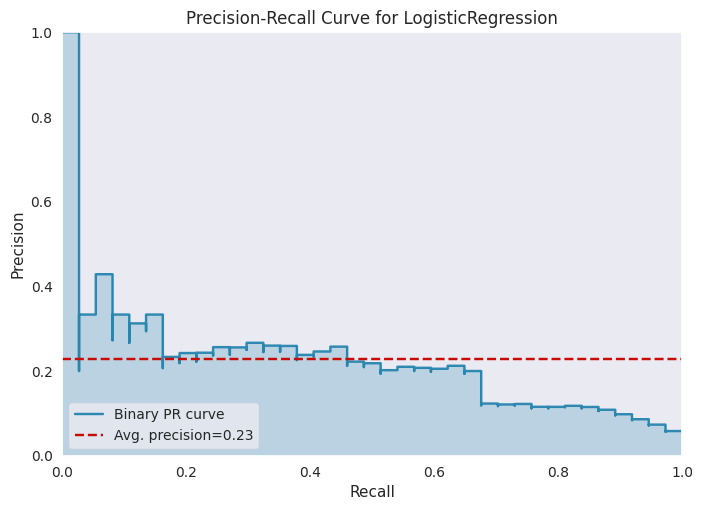

In [42]:
#plot precision-recall
plot_model(tuned_lr,'pr')

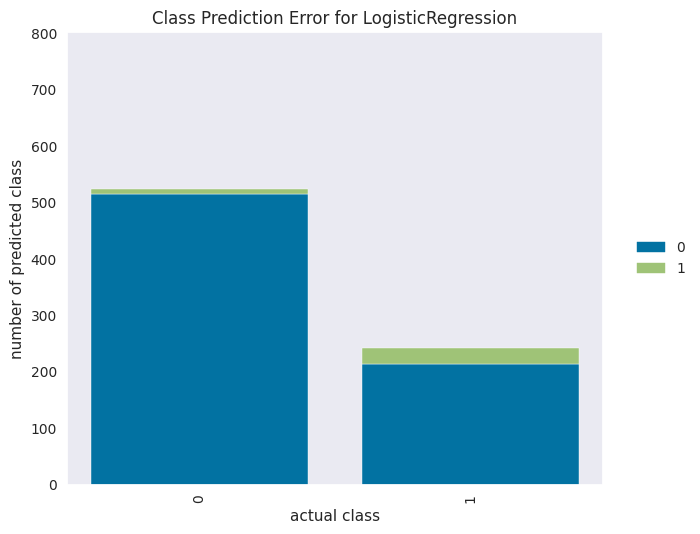

In [43]:
#plot - Class Prediction Error
plot_model(tuned_lr,'error' )

In [44]:
#predict on validation set
pred_holdout = predict_model(tuned_lr)
pred_holdout

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,geometric mean,balanced accuracy score,fbeta_score
0,Logistic Regression,0.7089,0.8294,0.7568,0.1157,0.2007,0.1276,0.2136,0.7312,0.7316,0.3590


,age,avg_glucose_level,bmi,gender_Male,hypertension_1,heart_disease_1,ever_married_Yes,work_type_Govt_job,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,stroke,Label,Score
0,0.401855,0.135537,0.157895,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0,0,0.7768
1,0.926758,0.787000,0.228886,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0,1,0.8619
2,0.206543,0.203905,0.133415,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0,0,0.9315
3,0.194336,0.183917,0.137087,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0,0,0.9557
4,0.780273,0.204413,0.230110,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0,1,0.7076
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
761,0.206543,0.068830,0.156671,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0,0.9347
762,0.780273,0.096944,0.341493,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0,1,0.6516
763,0.987793,0.070077,0.189718,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1,1,0.7840
764,0.987793,0.087250,0.179927,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1,1,0.8695


In [45]:
#finalize
final=finalize_model(tuned_lr)
final

LogisticRegression(C=0.081, class_weight={}, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [46]:
#predict on test set(unseen)
prediction=predict_model(final,data=unseen)
prediction

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,geometric mean,balanced accuracy score,fbeta_score
0,Logistic Regression,0.7223,0.8356,0.8158,0.1308,0.2255,0.1531,0.2504,0.7650,0.7666,0.3985


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,Label,Score
1184,Female,79.0,0,0,Yes,Private,Urban,65.59,28.1,never smoked,0,1,0.7029
1913,Female,45.0,0,0,Yes,Private,Urban,90.35,22.3,never smoked,0,0,0.7355
4568,Female,2.0,0,0,No,children,Urban,94.92,20.4,Unknown,0,0,0.9634
4154,Female,49.0,0,0,Yes,Private,Rural,125.63,57.2,Unknown,0,0,0.6554
4701,Male,50.0,0,0,Yes,Private,Urban,120.44,30.3,never smoked,0,0,0.6895
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2338,Male,54.0,0,0,Yes,Private,Rural,206.52,35.4,smokes,0,1,0.5233
330,Female,78.0,0,0,Yes,Private,Urban,243.50,26.1,never smoked,0,1,0.8252
343,Male,64.0,0,0,Yes,Govt_job,Urban,239.64,34.6,formerly smoked,0,1,0.7129
3739,Male,10.0,0,0,No,children,Rural,117.03,21.1,never smoked,0,0,0.9596


In [51]:
prediction[prediction['stroke'] ==0][0:25]

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,Label,Score
1184,Female,79.0,0,0,Yes,Private,Urban,65.59,28.100000,never smoked,0,1,0.7029
1913,Female,45.0,0,0,Yes,Private,Urban,90.35,22.300000,never smoked,0,0,0.7355
4568,Female,2.0,0,0,No,children,Urban,94.92,20.400000,Unknown,0,0,0.9634
4154,Female,49.0,0,0,Yes,Private,Rural,125.63,57.200000,Unknown,0,0,0.6554
4701,Male,50.0,0,0,Yes,Private,Urban,120.44,30.300000,never smoked,0,0,0.6895
2848,Male,63.0,0,0,Yes,Private,Urban,222.66,37.000000,formerly smoked,0,1,0.6737
1241,Female,73.0,0,0,Yes,Self-employed,Rural,79.69,28.893237,formerly smoked,0,1,0.7011
3153,Female,55.0,0,0,Yes,Private,Urban,84.37,22.200000,Unknown,0,0,0.5632
3985,Female,49.0,0,0,Yes,Self-employed,Urban,75.15,25.000000,Unknown,0,0,0.6529
3039,Male,25.0,0,0,Yes,Private,Urban,89.87,26.500000,never smoked,0,0,0.9159


In [52]:
prediction[prediction['stroke'] ==1][0:25]

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,Label,Score
130,Female,73.0,1,0,Yes,Private,Rural,190.14,36.500000,never smoked,1,1,0.8058
195,Male,59.0,0,0,Yes,Private,Urban,200.62,35.800000,formerly smoked,1,1,0.5990
213,Female,48.0,0,0,Yes,Private,Urban,74.11,20.500000,never smoked,1,0,0.7125
184,Male,61.0,1,1,Yes,Private,Urban,112.24,37.400000,smokes,1,1,0.7761
119,Female,77.0,0,0,Yes,Private,Urban,105.22,31.000000,never smoked,1,1,0.7106
186,Male,63.0,0,1,Yes,Self-employed,Urban,116.69,34.500000,formerly smoked,1,1,0.7017
98,Male,57.0,1,0,Yes,Govt_job,Urban,78.92,27.700000,formerly smoked,1,1,0.5890
228,Female,39.0,0,0,Yes,Self-employed,Urban,97.76,29.600000,smokes,1,0,0.7206
247,Male,71.0,1,0,Yes,Self-employed,Rural,87.80,28.893237,Unknown,1,1,0.7237
207,Male,78.0,0,0,No,Self-employed,Urban,90.19,26.900000,never smoked,1,1,0.6607


/home/rotimi123/anaconda3/envs/pycaret_notabook/lib/python3.8/site-packages/sklearn/utils/deprecation.py:101: FutureWarning: Attribute standard_coef_ was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn(msg, category=FutureWarning)
/home/rotimi123/anaconda3/envs/pycaret_notabook/lib/python3.8/site-packages/sklearn/utils/deprecation.py:101: FutureWarning: Attribute standard_intercept_ was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn(msg, category=FutureWarning)
/home/rotimi123/anaconda3/envs/pycaret_notabook/lib/python3.8/site-packages/sklearn/utils/deprecation.py:101: FutureWarning: Attribute average_coef_ was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn(msg, category=FutureWarning)
/home/rotimi123/anaconda3/envs/pycaret_notabook/lib/python3.8/site-packages/sklearn/utils/deprecation.py:101: FutureWarning: Attribute average_intercept_ was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn(m

In [48]:
#confusion matrix
print(confusion_matrix(prediction["stroke"],prediction["Label"]))

[[523 206]
 [  7  31]]


In [49]:
# imbalanced classification report
print(classification_report_imbalanced(prediction["stroke"],prediction["Label"]))

                   pre       rec       spe        f1       geo       iba       sup

          0       0.99      0.72      0.82      0.83      0.77      0.58       729
          1       0.13      0.82      0.72      0.23      0.77      0.59        38

avg / total       0.94      0.72      0.81      0.80      0.77      0.58       767



In [ ]:
###Finalized 

In [114]:
history_SMTN = setup(data=df,
                     target='class',
                     silent=True,
                     fix_imbalance=True,
                     fix_imbalance_method=SMTN,
                     normalize=True,
                     normalize_method='minmax',
                     transformation=True,
                     session_id=42)


,Description,Value
0,session_id,42
1,Target,class
2,Target Type,Binary
3,Label Encoded,"0.0: 0, 1.0: 1"
4,Original Data,"(1000, 21)"
5,Missing Values,False
6,Numeric Features,3
7,Categorical Features,17
8,Ordinal Features,False
9,High Cardinality Features,False


In [115]:

add_metric('fbeta score', 'fbeta_score', fbeta_score,target = 'pred',beta = 2.0, greater_is_better = True)

Name                                              fbeta_score
Display Name                                      fbeta_score
Score Function       <function fbeta_score at 0x7f73d82983a0>
Scorer                     make_scorer(fbeta_score, beta=2.0)
Target                                                   pred
Args                                            {'beta': 2.0}
Greater is Better                                        True
Multiclass                                               True
Custom                                                   True
Name: fbeta_score, dtype: object

In [116]:
add_metric('balanced_accuracy_score', 'balanced accuracy score', balanced_accuracy_score, greater_is_better = True)

Name                                           balanced accuracy score
Display Name                                   balanced accuracy score
Score Function       <function balanced_accuracy_score at 0x7f73d82...
Scorer                            make_scorer(balanced_accuracy_score)
Target                                                            pred
Args                                                                {}
Greater is Better                                                 True
Multiclass                                                        True
Custom                                                            True
Name: balanced_accuracy_score, dtype: object

In [117]:
# train the dataset
compare_models(n_select=1,sort='fbeta_score',include = [grid_rf],cross_validation=False)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,fbeta_score,balanced accuracy score,TT (Sec)
0,Random Forest Classifier,0.6179,0.7955,0.9121,0.4368,0.5907,0.3077,0.3832,0.7491,0.7013,1.2900


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=-1, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [118]:
#finalize
final=finalize_model(grid_rf)
final

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=-1, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [119]:
save_model(final,"german-oct15-2022-grid_rf")

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=False, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[], target='class',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_strat...
                  RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                         class_weight='balanced',
                                         criterion='entropy', max_depth=None,
                                         max_features='aut

In [ ]:
load_result = load_model('oil-price-oct12-2022')
